# EDA PROJECT 3 : 평소에 관심있던 분야의 데이터셋을 골라서 탐색해보기(대전광역시 유성구_지역화폐 발급월별 소비금액 지수 데이터)

In [ ]:
궁금한 것 & 가설?
1. 남녀 간 이용금액의 차이가 있을까? 있다면 남녀 간 소비액의 분포는 어떤 모양일까? 
2. 연령대 별 이용금액은 차이가 있을까? 차이가 있다면 얼마나 있을까?
3. 이용건수와 이용금액의 관계는 어떤 관계일까?
4. 발급년월별 이용금액은 어떤 차이를 보일까?
5. 어느 동네가 이용금액이 가장 높을까?
6. 동네별 이용금액의 분포를 그래프로 시각화 할 수 있을까?
7. 동네별 남녀이용금액의 분포를 그래프로 시각화 할 수 있을까?
8. 동네별 연령대별 이용금액과 건수를 그래프로 시각화 할 수 있을까?
9. 동네별 모든 평균 이용금액을 시각화해보자.
10.

# 모집단의 정규성 검정 방법, 정규분포 형태를 띠는지 안띠는지 여부를 검정하는 방법과,
# 한쪽으로 치우친 데이터에 대한 정규분포로의 변환 방법을 발견했다. 정말 중요한 뽀인트
https://rfriend.tistory.com/118

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("./대전광역시 유성구_지역화폐 발급월별 소비금액 지수 데이터_20220531.csv", encoding='CP949')

In [30]:
df.shape

(190498, 8)

In [3]:
df = df.drop(columns=['광역시도코드','시군구코드', '법정동코드'], axis=1) 

In [4]:
df["발급년"]=df["발급년"].astype(str)
df["발급월"]=df["발급월"].astype(str)

In [5]:
for i in range(2,3):
    df["발급월"+str(i)] = df["발급월"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..

In [6]:
df["발급년월"] = df["발급년"] + df["발급월2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

In [7]:
df.head()

,발급년,발급월,광역시도명,시군구명,법정동명,연령대,성별,지수_이용건수,지수_이용금액,발급월2,발급년월
0,2020,5,대전광역시,동구,인동,30대,여성,100.0,100.0,05,202005
1,2020,5,대전광역시,동구,천동,40대,여성,100.0,100.0,05,202005
2,2020,5,대전광역시,동구,가오동,30대,남성,100.0,100.0,05,202005
3,2020,5,대전광역시,동구,가오동,40대,여성,100.0,100.0,05,202005
4,2020,5,대전광역시,동구,신흥동,30대,남성,100.0,100.0,05,202005


In [8]:
from datetime import datetime

df['발급년월']=df['발급년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

In [9]:
df = df[["발급년월","광역시도명","시군구명","법정동명","연령대","성별","지수_이용건수","지수_이용금액"]] #컬럼 순서 바꾸기

In [10]:
df.head()

,발급년월,광역시도명,시군구명,법정동명,연령대,성별,지수_이용건수,지수_이용금액
0,2020-05-01,대전광역시,동구,인동,30대,여성,100.0,100.0
1,2020-05-01,대전광역시,동구,천동,40대,여성,100.0,100.0
2,2020-05-01,대전광역시,동구,가오동,30대,남성,100.0,100.0
3,2020-05-01,대전광역시,동구,가오동,40대,여성,100.0,100.0
4,2020-05-01,대전광역시,동구,신흥동,30대,남성,100.0,100.0


In [13]:
def change_age(text:str):
    return text[:2]

df['연령대'] = df['연령대'].map(change_age).astype(int)
df.head()

,발급년월,광역시도명,시군구명,법정동명,연령대,성별,지수_이용건수,지수_이용금액
0,2020-05-01,대전광역시,동구,인동,30,여성,100.0,100.0
1,2020-05-01,대전광역시,동구,천동,40,여성,100.0,100.0
2,2020-05-01,대전광역시,동구,가오동,30,남성,100.0,100.0
3,2020-05-01,대전광역시,동구,가오동,40,여성,100.0,100.0
4,2020-05-01,대전광역시,동구,신흥동,30,남성,100.0,100.0


# 1. 연령대와 성별 분포도 파악

In [14]:
male_group = df[df['성별']=='남성'].groupby('연령대').sum()['지수_이용금액']
female_group = df[df['성별']=='여성'].groupby('연령대').sum()['지수_이용금액']

male_group2 = df[df['성별']=='남성'].groupby('연령대').sum()['지수_이용건수']
female_group2 = df[df['성별']=='여성'].groupby('연령대').sum()['지수_이용건수']


In [17]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

369.0740787829851

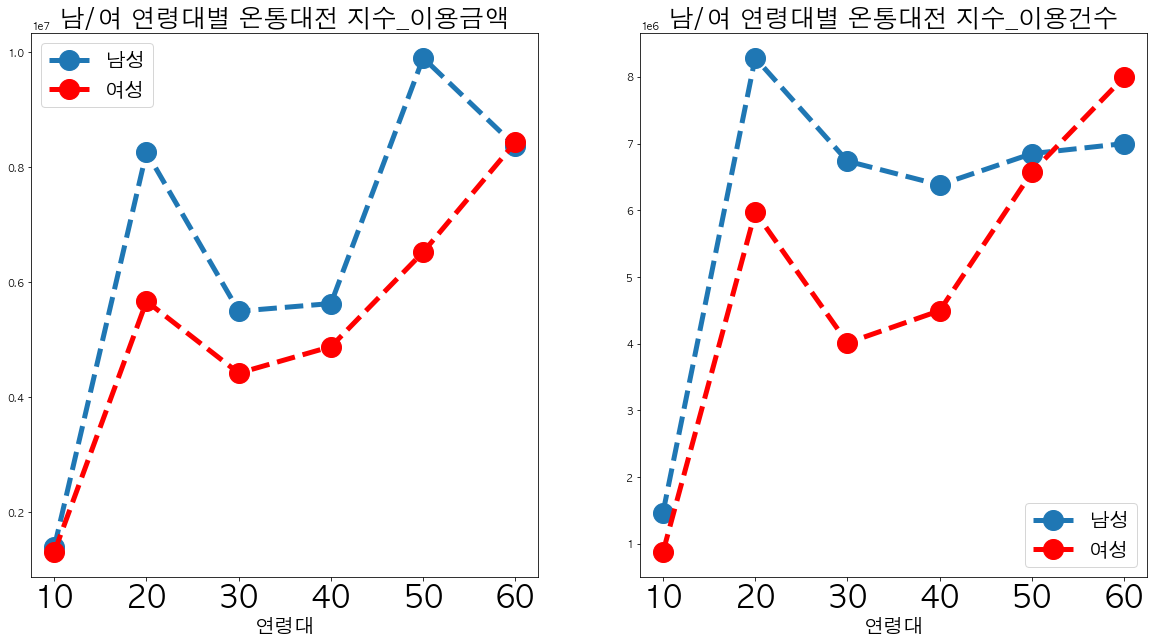

In [28]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(male_group.index,male_group,marker='o',markersize=20,linestyle='--',linewidth=5,label='남성')
plt.plot(female_group.index,female_group,color='red',marker='o',markersize=20,linestyle='--',linewidth=5,label='여성')
plt.xticks(fontsize=30)
plt.xlabel('연령대',fontsize=20)
plt.title("남/여 연령대별 온통대전 지수_이용금액",fontsize=25)
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.plot(male_group2.index,male_group2,marker='o',markersize=20,linestyle='--',linewidth=5,label='남성')
plt.plot(female_group2.index,female_group2,color='red',marker='o',markersize=20,linestyle='--',linewidth=5,label='여성')   
plt.xticks(fontsize=30)
plt.xlabel('연령대',fontsize=20)
plt.title('남/여 연령대별 온통대전 지수_이용건수',fontsize=25)
plt.legend(fontsize=20)

    
df['지수_이용금액'].mean()

In [31]:
df.head()

,발급년월,광역시도명,시군구명,법정동명,연령대,성별,지수_이용건수,지수_이용금액
0,2020-05-01,대전광역시,동구,인동,30,여성,100.0,100.0
1,2020-05-01,대전광역시,동구,천동,40,여성,100.0,100.0
2,2020-05-01,대전광역시,동구,가오동,30,남성,100.0,100.0
3,2020-05-01,대전광역시,동구,가오동,40,여성,100.0,100.0
4,2020-05-01,대전광역시,동구,신흥동,30,남성,100.0,100.0


# 2. 사용자의 지역별 카드이용건수과 카드이용금액분석


In [33]:
df_where = df[['시군구명','법정동명']]
df_where

,시군구명,법정동명
0,동구,인동
1,동구,천동
2,동구,가오동
3,동구,가오동
4,동구,신흥동
...,...,...
190493,계룡시,엄사면
190494,계룡시,신도안면
190495,계룡시,신도안면
190496,계룡시,신도안면


In [48]:
def graph_age_female(age):
        a2= df[(df['성별']=='여성') & (df['연령대']==age) ]


        df_usect_sort = a2.sort_values('지수_이용건수',ascending=False)
        df_usect_sort.drop_duplicates(['법정동명'],inplace=True)
#         중복순위를 제거 하기위해 중벅된 업종은 삭제

        merge_table = pd.merge(df_usect_sort,df_where,how='left',left_on='법정동명',right_on='시군구명')


        a2= df[(df['성별']=='여성') & (df['연령대']==age) ]
        df_usect_sort = a2.sort_values('지수_이용금액',ascending=False)
        df_usect_sort.drop_duplicates(['법정동명'],inplace=True)



        merge_table2 = pd.merge(df_usect_sort,df_where,how='left',left_on='법정동명',right_on='시군구명')


        plt.figure(figsize=(15,15))
        plt.subplot(1,2,1)

        x= merge_table['법정동명'].values
        y =merge_table['지수_이용건수'].values
        plt.barh(x,y)
        
        str_title=str(age)+"대 여성의 카드이용건수"
        plt.yticks(fontsize=15)
        plt.title(str_title,fontsize=20)
    
        
        
        plt.subplot(1,2,2)
        x2= merge_table2['법정동명'].values
        y2 =merge_table2['지수_이용금액'].values
        plt.barh(x2,y2,color='red',alpha=0.3,linewidth=5)
        str_title2=str(age)+"대 여성의 카드이용금액"
        plt.yticks(fontsize=15)
        plt.title(str_title2,fontsize=20)
        
        
        
        
def graph_age_male(age):
        a2= df[(df['성별']=='여성') & (df['연령대']==age) ]


        df_usect_sort = a2.sort_values('지수_이용건수',ascending=False)
        df_usect_sort.drop_duplicates(['법정동명'],inplace=True)
#         중복순위를 제거 하기위해 중벅된 업종은 삭제

        merge_table = pd.merge(df_usect_sort,df_where,how='left',left_on='법정동명',right_on='시군구명')


        a2= df[(df['성별']=='여성') & (df['연령대']==age) ]
        df_usect_sort = a2.sort_values('지수_이용금액',ascending=False)
        df_usect_sort.drop_duplicates(['법정동명'],inplace=True)



        merge_table2 = pd.merge(df_usect_sort,df_where,how='left',left_on='법정동명',right_on='시군구명')


        plt.figure(figsize=(15,15))
        plt.subplot(1,2,1)

        x= merge_table['법정동명'].values
        y =merge_table['지수_이용건수'].values
        plt.barh(x,y)
        
        str_title=str(age)+"대 여성의 카드이용건수"
        plt.yticks(fontsize=15)
        plt.title(str_title,fontsize=20)
    
        
        
        plt.subplot(1,2,2)
        x2= merge_table2['법정동명'].values
        y2 =merge_table2['지수_이용금액'].values
        plt.barh(x2,y2,color='red',alpha=0.3,linewidth=5)
        str_title2=str(age)+"대 여성의 카드이용금액"
        plt.yticks(fontsize=15)
        plt.title(str_title2,fontsize=20)


In [ ]:
df['기준년월(YM)'] =df2['기준년월(YM)'].astype(str)
df['year'] =df2['기준년월(YM)'].str.slice(start=0,stop=4)
df['month'] =df2['기준년월(YM)'].str.slice(start=4,stop=6)

In [ ]:

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
t2 = df2.groupby(by='year').sum()['카드이용금액계(AM']
plt.plot(t2.index,t2,"-o")
plt.title('연도별 카드 이용금액',fontsize=20)
plt.xticks(fontsize=20)



plt.subplot(1,2,2)
t2 = df2.groupby(by='year').sum()['소액결제건수(MICRO_PYM)']
plt.plot(t2.index,t2,"-o",color='red')
plt.title('연도별 카드 사용건수',fontsize=20)
plt.xticks(fontsize=20)


In [101]:
def outliers_iqr(data):
    q1,q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [102]:
times_outlier_index =  outliers_iqr(df["지수_이용건수"])[0]
amount_outlier_index = outliers_iqr(df["지수_이용금액"])[0]

In [103]:
df.loc[times_outlier_index,"지수_이용건수"] #이상치 확인

613       1475.00
619        883.33
622       1266.67
623       2550.00
625        900.00
           ...   
190348    1045.45
190349    1541.30
190382    1547.06
190386    1788.89
190410    1142.86
Name: 지수_이용건수, Length: 20250, dtype: float64

In [104]:
df.loc[amount_outlier_index,"지수_이용금액"]

610        788.88
613       3454.96
622       2157.77
623       1538.29
632       1942.06
           ...   
190386    2930.95
190387     841.39
190410     788.82
190422     682.44
190487    1752.28
Name: 지수_이용금액, Length: 22084, dtype: float64

In [105]:
outlier = np.concatenate((times_outlier_index,amount_outlier_index), axis = None)
print(len(outlier)) #이상치 개수와 이상치 확인
outlier

42334


array([   613,    619,    622, ..., 190410, 190422, 190487])

In [106]:
not_outlier_index = [] #for문을 이용하여 이상치가 아닌 데이터들을 not_outlier에 넣기

for i in df.index:
    if i not in outlier :
        not_outlier_index.append(i)

In [111]:
df_clean = df.loc[not_outlier_index]
df_clean = df_clean.reset_index(drop = True)
df_clean.describe()

,지수_이용건수,지수_이용금액
count,164544.000000,164544.000000
mean,159.360811,127.254973
std,176.831431,144.414624
min,0.160000,0.040000
25%,35.080000,25.050000
50%,89.820000,70.350000
75%,217.080000,173.580000
max,837.930000,680.330000


In [112]:
df_times_clean = df_clean[df_clean["지수_이용건수"] > 100]
df_times_clean = df_times_clean.reset_index(drop = True)
df_times_clean.describe()

,지수_이용건수,지수_이용금액
count,74138.000000,74138.000000
mean,299.954890,230.919071
std,180.110509,154.891816
min,100.090000,1.490000
25%,153.555000,109.910000
50%,240.000000,185.360000
75%,403.800000,320.057500
max,837.930000,680.330000


<AxesSubplot:>

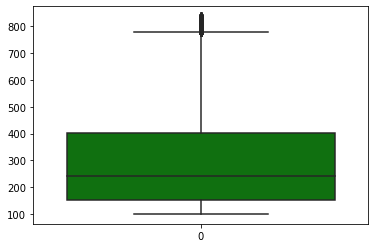

In [113]:
sns.boxplot(data = df_times_clean["지수_이용건수"], color = 'green')

<AxesSubplot:>

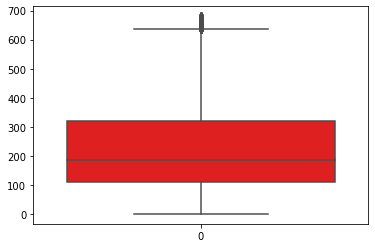

In [72]:
sns.boxplot(data = df_times_clean["지수_이용금액"], color = 'red')

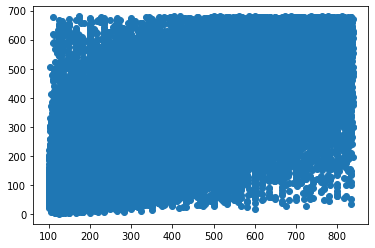

In [73]:
plt.scatter(df_times_clean["지수_이용건수"], df_times_clean["지수_이용금액"])

([<matplotlib.axis.YTick at 0x7f8ad8d86040>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

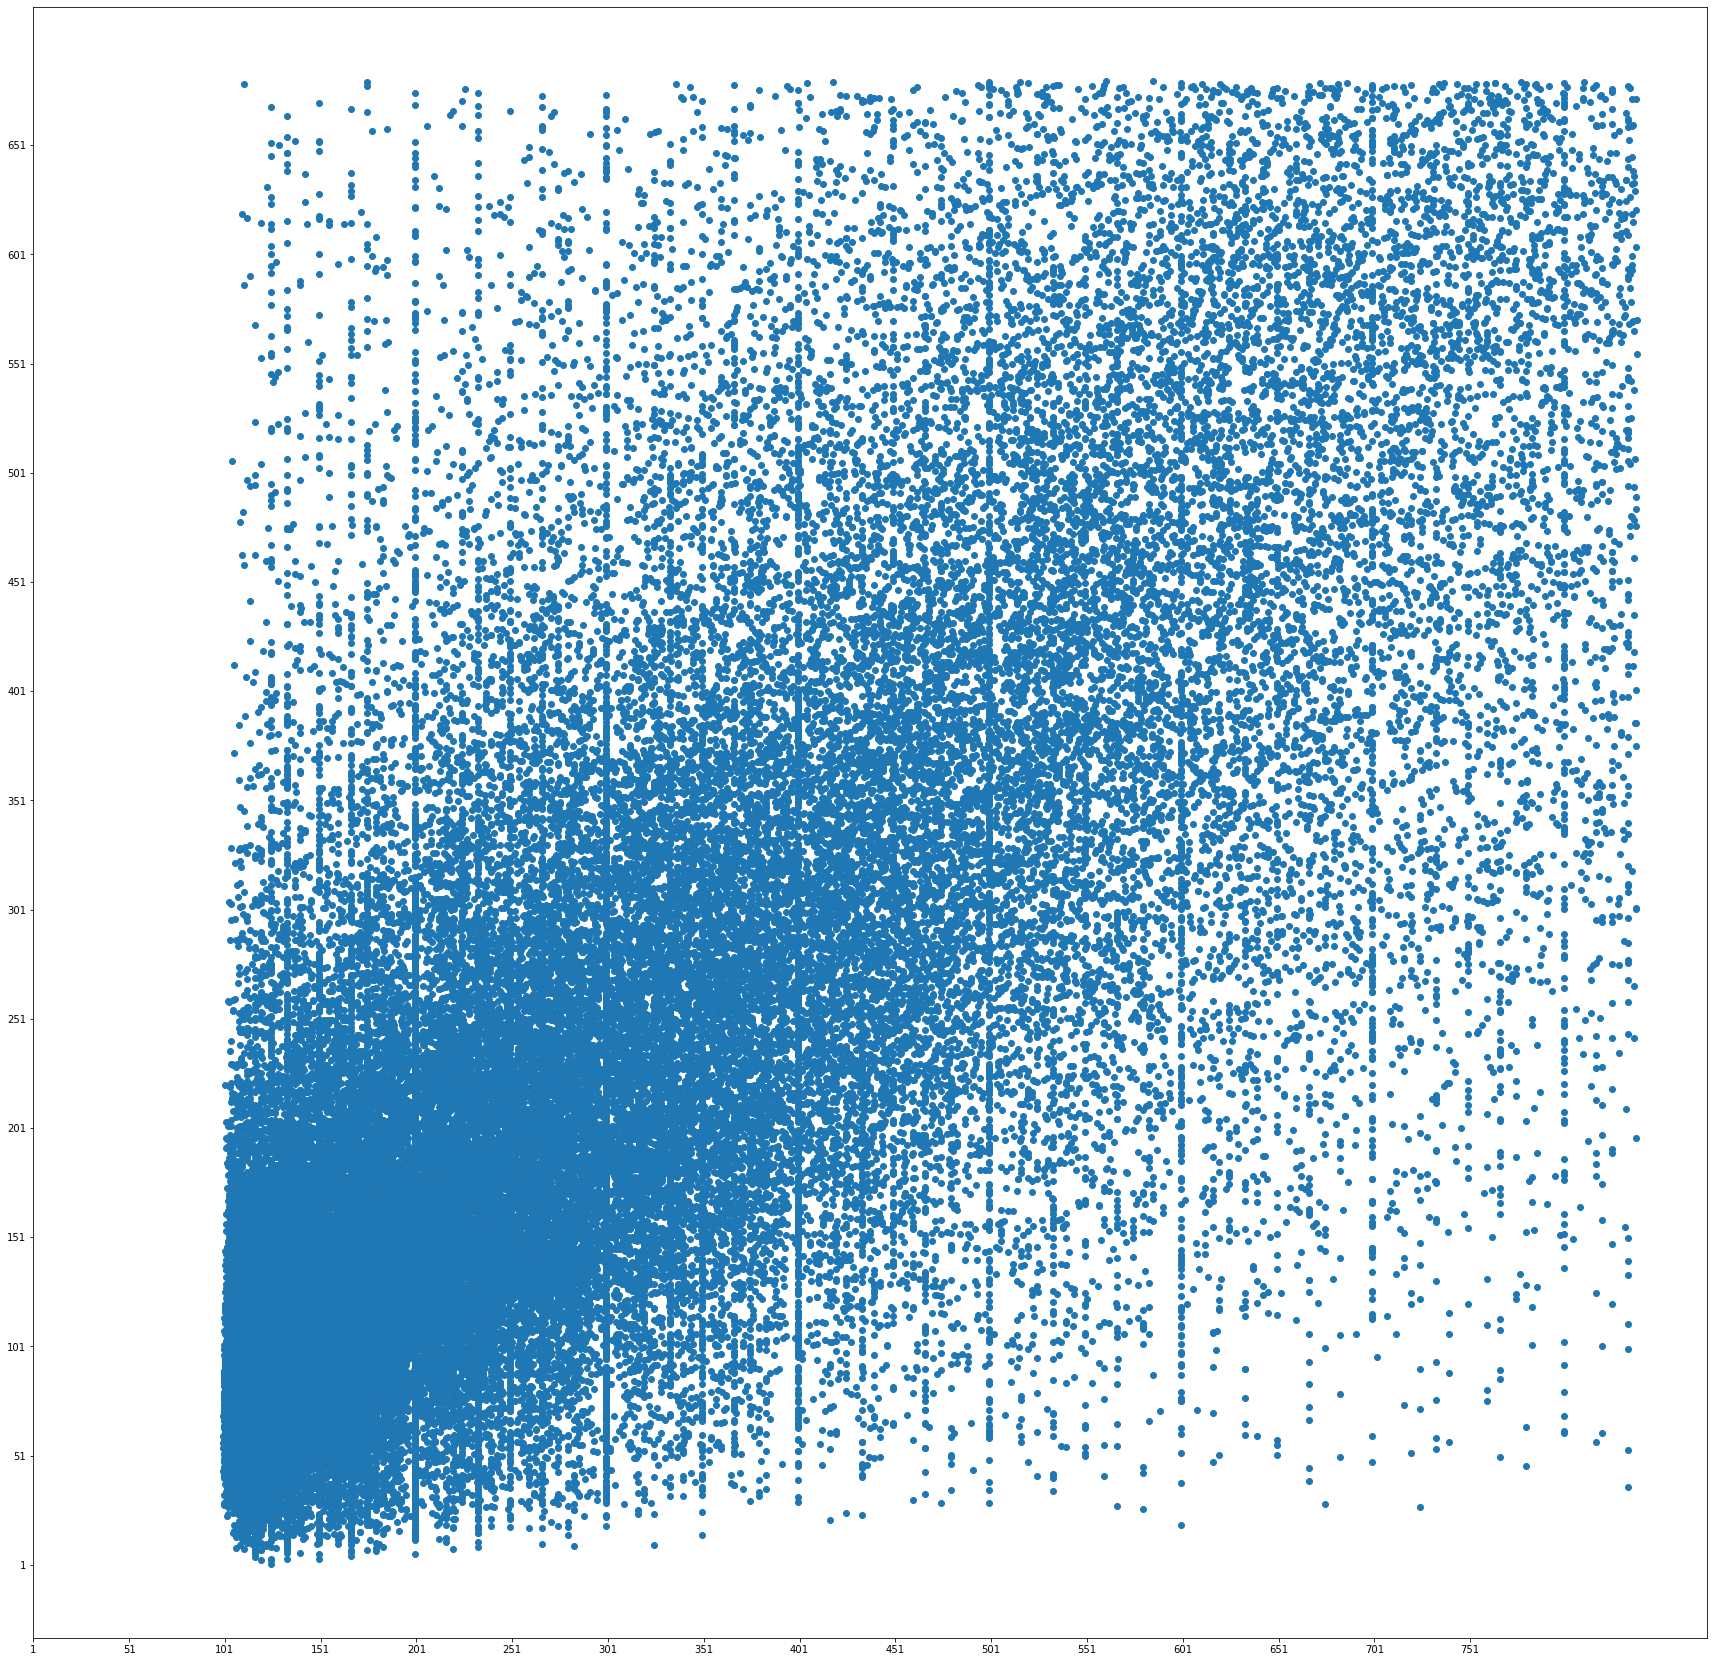

In [76]:
plt.figure(figsize = (30,30))
plt.scatter(df_times_clean["지수_이용건수"], df_times_clean["지수_이용금액"])
plt.xticks(np.arange(1,800,50))
plt.yticks(np.arange(1,689,50))

In [114]:
df_times_clean.head()

,발급년월,광역시도명,시군구명,법정동명,연령대,성별,지수_이용건수,지수_이용금액
0,2020-05-01,대전광역시,동구,인동,30대,여성,387.50,628.94
1,2020-05-01,대전광역시,동구,천동,40대,여성,820.00,532.16
2,2020-05-01,대전광역시,동구,대동,40대,남성,460.00,452.61
3,2020-05-01,대전광역시,동구,대동,40대,여성,433.33,261.59
4,2020-05-01,대전광역시,동구,자양동,20대,여성,469.23,354.82


In [132]:
sum(df_times_clean["성별"] == "남성")

39764

In [125]:
#최빈값 구하기

In [134]:
from scipy.stats import mode
print(mode(df_times_clean["발급년월"]))
print(mode(df_times_clean["광역시도명"]))
print(mode(df_times_clean["시군구명"]))
print(mode(df_times_clean["법정동명"]))
print(mode(df_times_clean["연령대"]))
print(mode(df_times_clean["성별"]))

ModeResult(mode=array(['2020-06-01T00:00:00.000000000'], dtype='datetime64[ns]'), count=array([11672]))
ModeResult(mode=array(['대전광역시'], dtype=object), count=array([67831]))
ModeResult(mode=array(['유성구'], dtype=object), count=array([35500]))
ModeResult(mode=array(['송강동'], dtype=object), count=array([1957]))
ModeResult(mode=array(['20대'], dtype=object), count=array([18868]))
ModeResult(mode=array(['남성'], dtype=object), count=array([39764]))


# 정규성 검정

## 1. QQplot 

Figure(432x288)


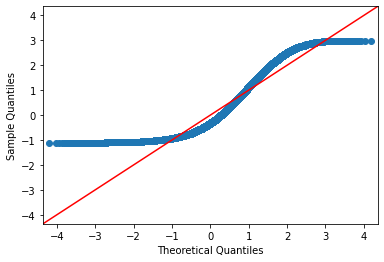

In [144]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

use_times = df_times_clean["지수_이용건수"]
use_amount = df_times_clean["지수_이용금액"]

print(sm.qqplot(use_times, fit=True, line='45'))

Figure(432x288)


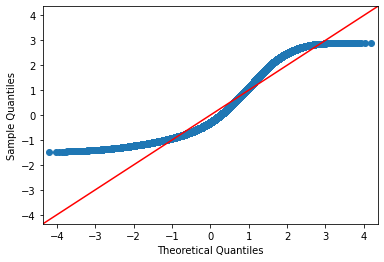

In [145]:
print(sm.qqplot(use_amount, fit=True, line='45'))